In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.shape

(541909, 8)

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

C:\Users\91924\anaconda33\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


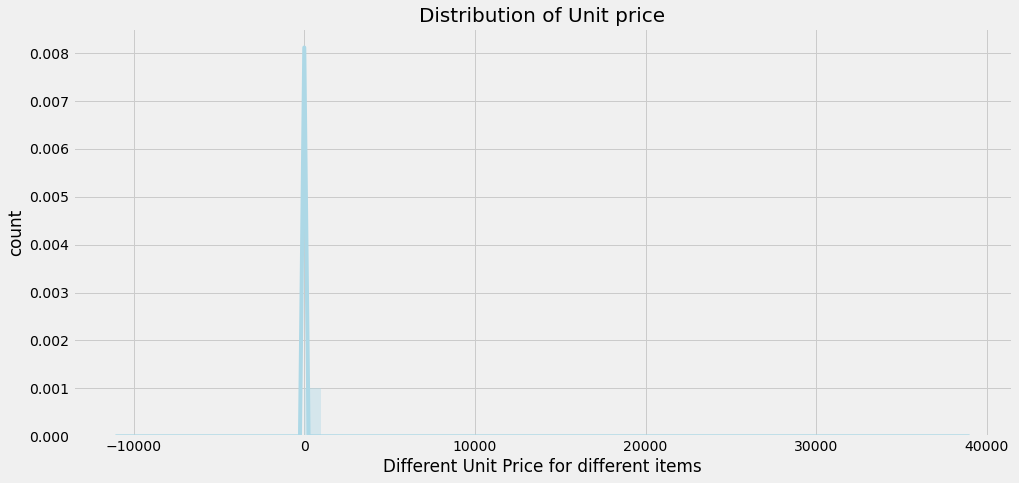

In [11]:
# visualizing the unitprice

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
sns.distplot(df['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

In [16]:
df['Country'].value_counts().head(20)

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

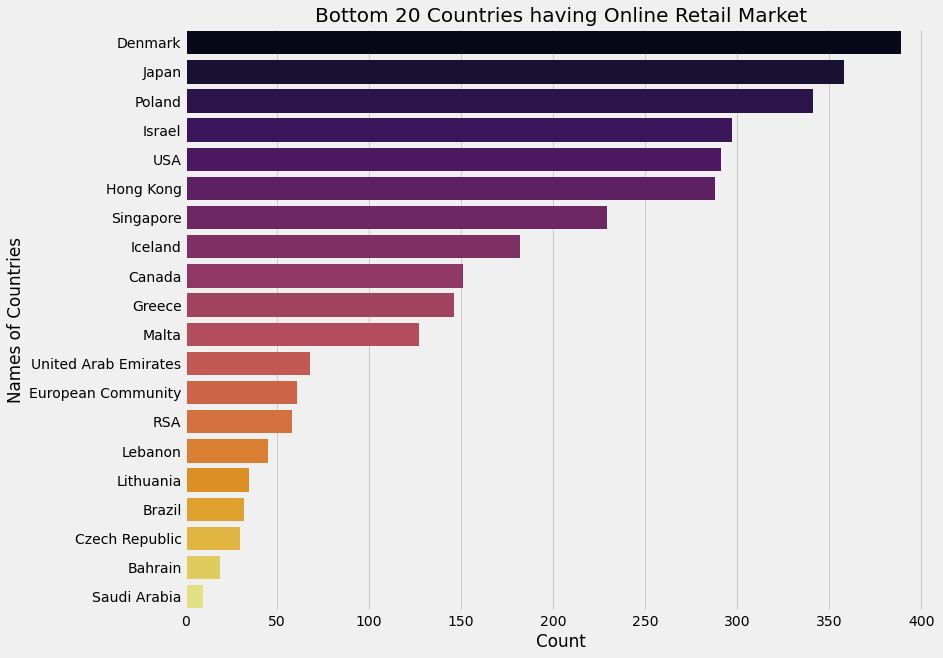

In [18]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = df['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Names of Countries')
plt.show()

Country
Netherlands             200128
EIRE                    142637
Germany                 117448
France                  110480
Australia                83653
Sweden                   35637
Switzerland              30325
Spain                    26824
Japan                    25218
Belgium                  23152
Norway                   19247
Portugal                 16180
Finland                  10666
Channel Islands           9479
Denmark                   8188
Italy                     7999
Cyprus                    6317
Singapore                 5234
Austria                   4827
Hong Kong                 4769
Israel                    4353
Poland                    3653
Unspecified               3300
Canada                    2763
Iceland                   2458
Greece                    1556
USA                       1034
United Arab Emirates       982
Malta                      944
Lithuania                  652
Czech Republic             592
European Community         497


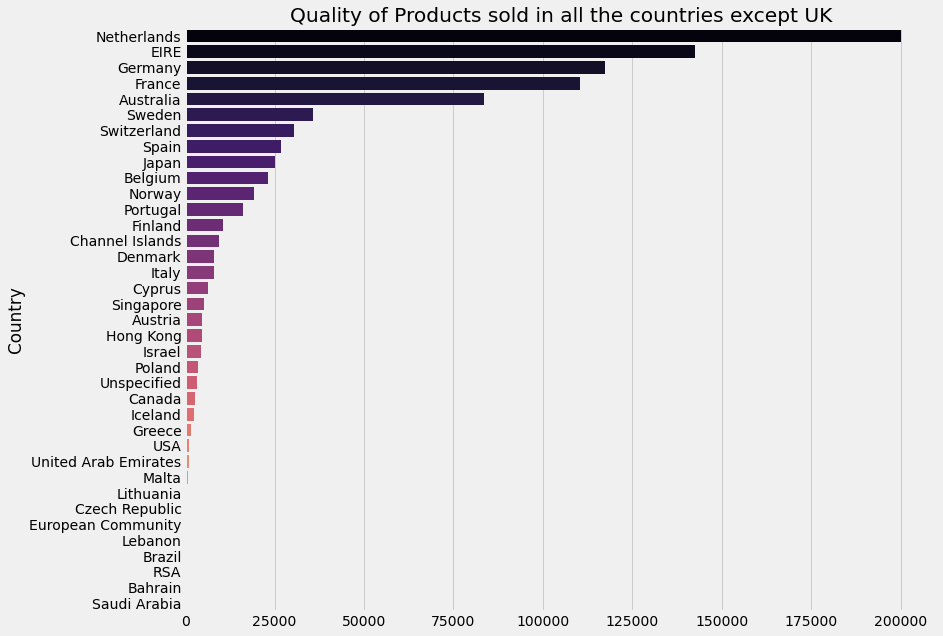

In [22]:
# checking how many quantity of products have been sold online from each country

a = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)

sns.barplot(x = a.values, y = a.index, palette = 'magma')
plt.title('Quality of Products sold in all the countries except UK')
plt.show()

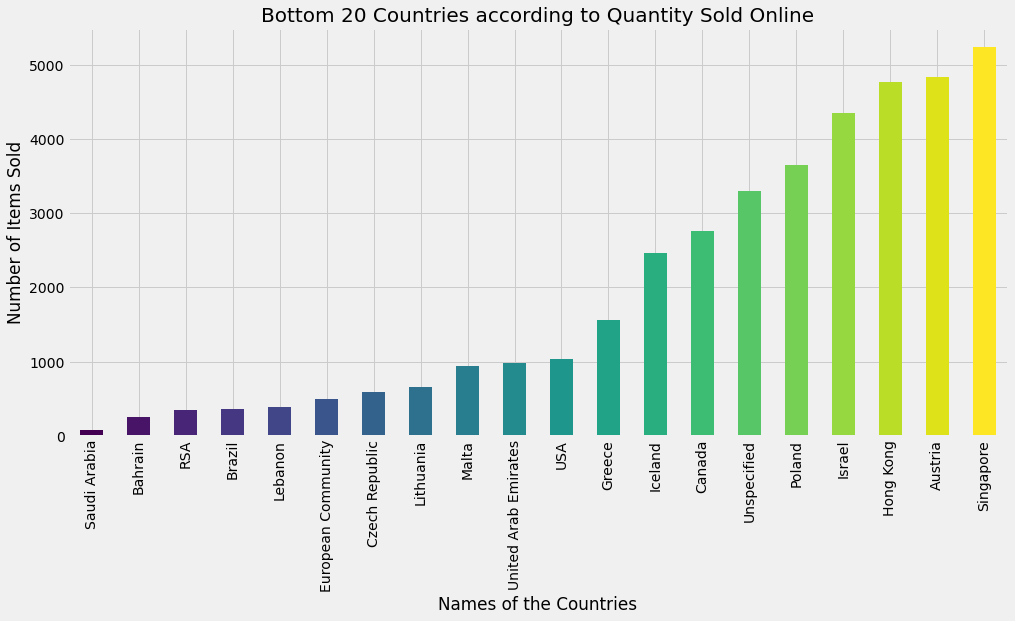

In [23]:
# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

color = plt.cm.viridis(np.linspace(0, 1, 20))
df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7),
                                                                                                    color = color)

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

C:\Users\91924\anaconda33\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


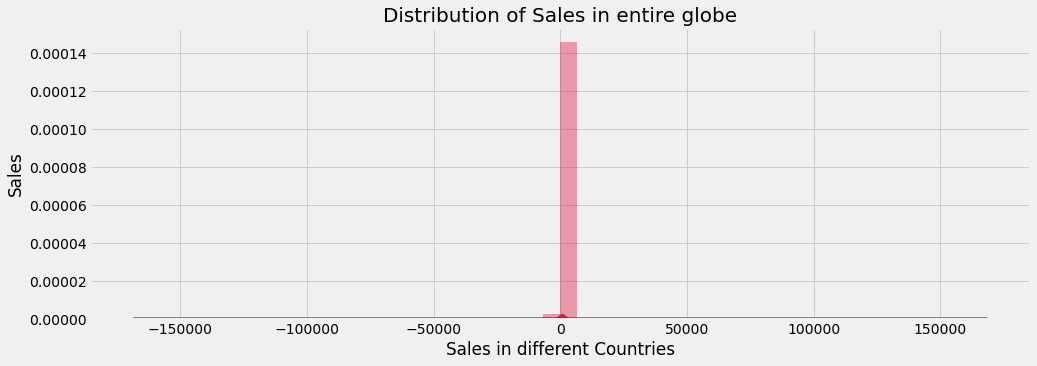

In [30]:

# FEATURE ENGINEERING 
# ADDING A COLUMN TO THE DATASET

# sales = unitprice*quantity

df['Sales'] = df['UnitPrice'] * df['Quantity']

# visualizing the sales in the entire globe
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Sales'], color = 'crimson')
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

Country
Netherlands             284661.54
EIRE                    263276.82
Germany                 221698.21
France                  197403.90
Australia               137077.27
Switzerland              56385.35
Spain                    54774.58
Belgium                  40910.96
Sweden                   36595.91
Japan                    35340.62
Norway                   35163.46
Portugal                 29367.02
Finland                  22326.74
Channel Islands          20086.29
Denmark                  18768.14
Italy                    16890.51
Cyprus                   12946.29
Austria                  10154.32
Hong Kong                10117.04
Singapore                 9120.39
Israel                    7907.82
Poland                    7213.14
Unspecified               4749.79
Greece                    4710.52
Iceland                   4310.00
Canada                    3666.38
Malta                     2505.47
United Arab Emirates      1902.28
USA                       1730.92
Lebano

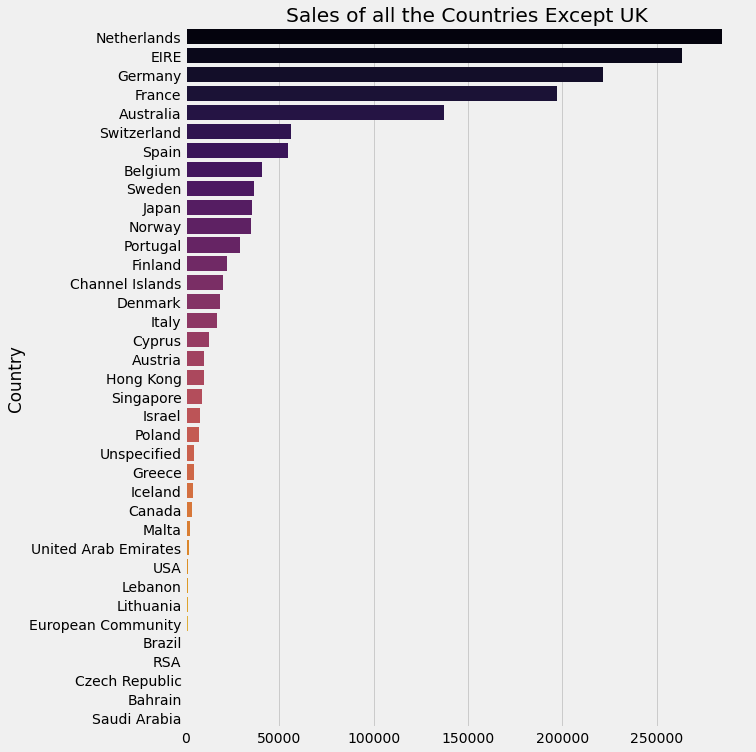

In [31]:
# looking at each country's sales

plt.rcParams['figure.figsize'] = (9, 12)
a = df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Sales of all the Countries Except UK')
plt.show()

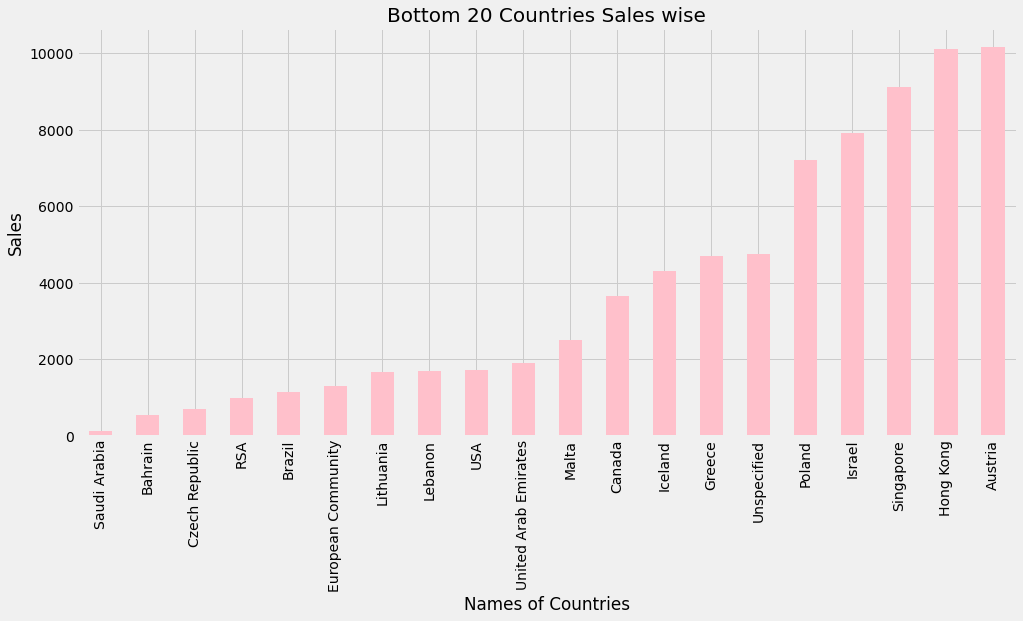

In [32]:
# looking at the bottom 20 countries sales wise

df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

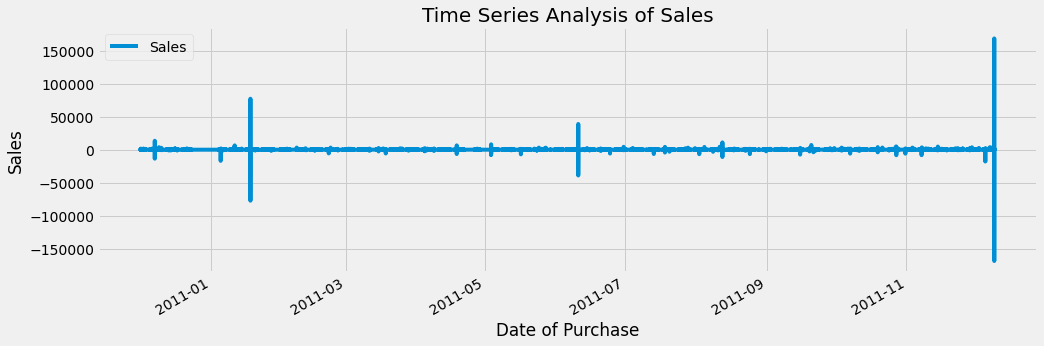

In [33]:
# let's look at Sales vs Invoicedate (Time series Analysis)

plt.rcParams['figure.figsize'] = (15, 5)
df.plot(x = 'InvoiceDate', y = 'Sales')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales')
plt.show()

In [34]:
# checking how many unique customer IDs are there

x = df['CustomerID'].nunique()

# printing the value
print("There are {} number of different customers".format(x))

There are 4372 number of different customers


In [35]:
# checking different number of unique countries present in this dataset

x = df['Country'].nunique()

# printing the result
print("There are {} number of different countries who do online retailing from UK".format(x))

There are 38 number of different countries who do online retailing from UK


Text(0.5, 1.0, 'Time-Series plot for UK')

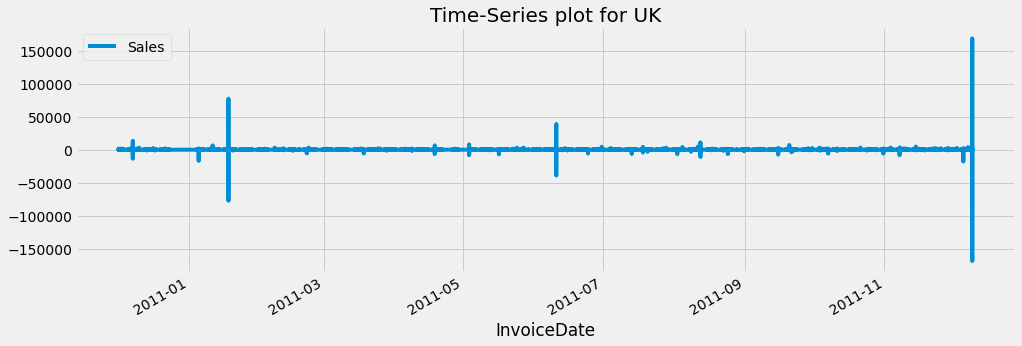

In [36]:
#defining a function to plot time-series plot for any country

def time_series(country):
  dataset = df[df['Country'] == country]
  dataset.plot(x = 'InvoiceDate', y = 'Sales')
  
  
time_series('United Kingdom')
plt.title('Time-Series plot for UK', fontsize = 20)

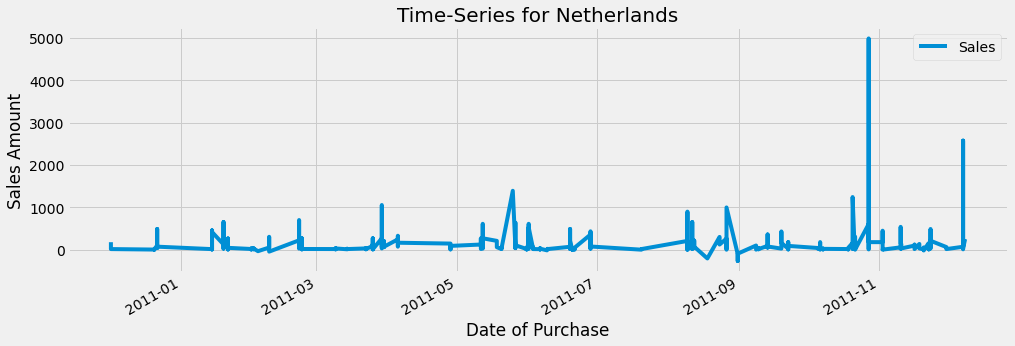

In [37]:
# time-series plot for netherlands

dataset = df[df['Country'] == 'Netherlands']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Netherlands', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

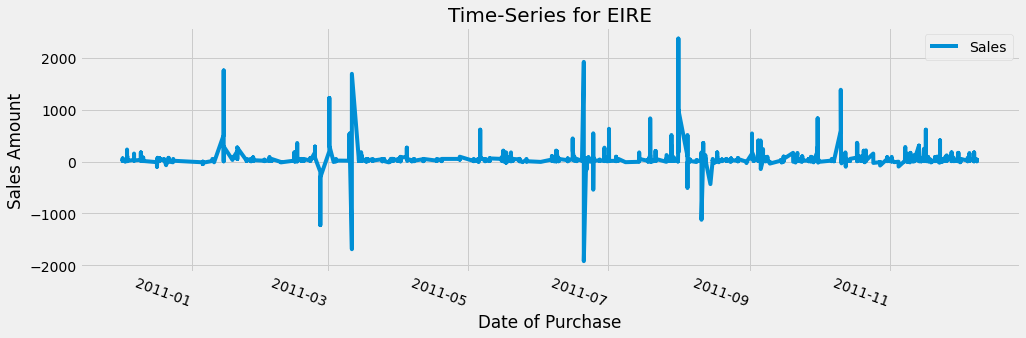

In [38]:
# time-series plot for EIRE

dataset = df[df['Country'] == 'EIRE']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for EIRE', fontsize = 20)
plt.xticks(rotation = -20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

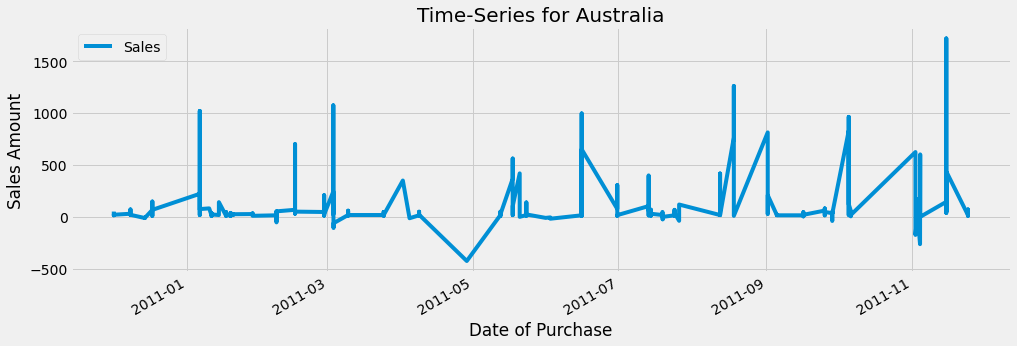

In [39]:
# time-series plot for Australia

dataset = df[df['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

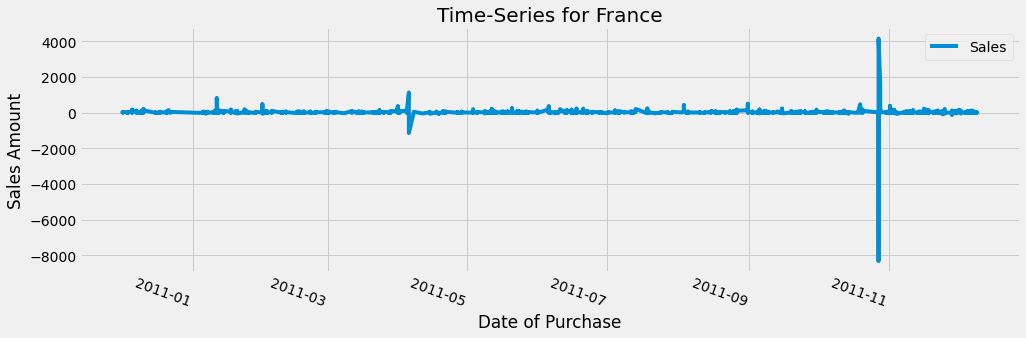

In [40]:
# time-series plot for France

dataset = df[df['Country'] == 'France']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for France', fontsize = 20)
plt.xticks(rotation = -20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

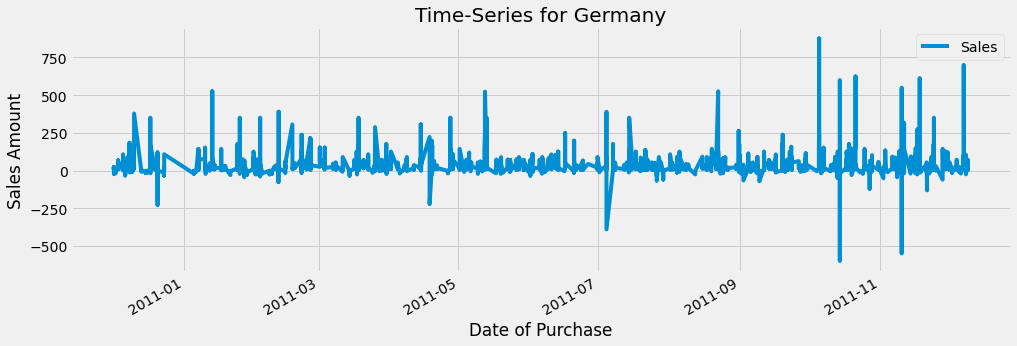

In [41]:
# time-series plot for Germany

dataset = df[df['Country'] == 'Germany']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Germany', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

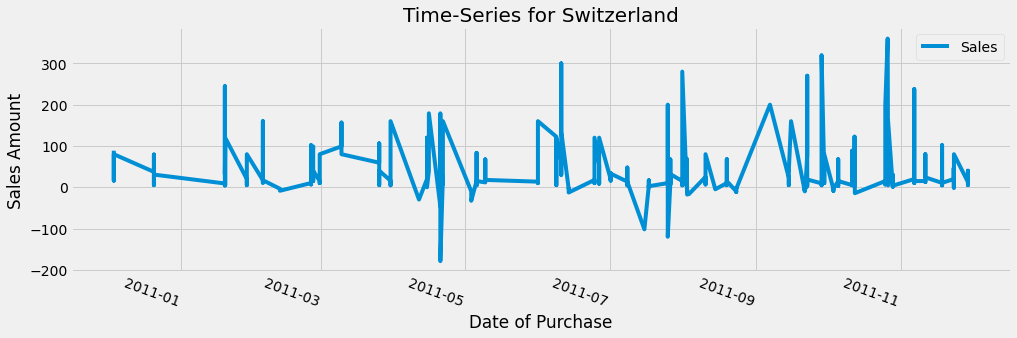

In [42]:
# time-series plot for Switzlerland

dataset = df[df['Country'] == 'Switzerland']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Switzerland', fontsize = 20)
plt.xticks(rotation = -20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

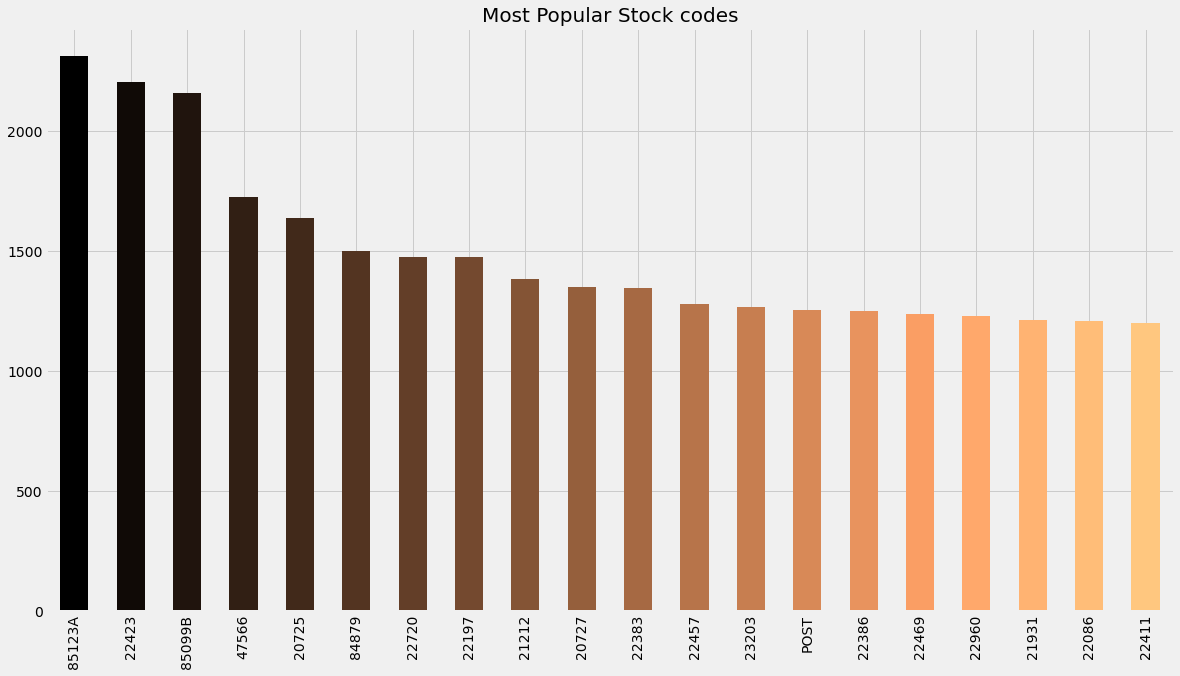

In [43]:

# looking the stockcode for the datset

color = plt.cm.copper(np.linspace(0, 1, 20))
df['StockCode'].value_counts().head(20).plot.bar(color = color, figsize = (18, 10))
plt.title('Most Popular Stock codes', fontsize = 20)
plt.show()

In [44]:
# sorting the dataset by sales amount

df.sort_values(by = 'Sales')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
...,...,...,...,...,...,...,...,...,...
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60


In [45]:
# sorting the datset by unit price

df.sort_values(by = 'UnitPrice', ascending = False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,-16453.71
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom,-11586.50
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06


In [46]:
# Stripping extra spaces in the description 
df['Description'] = df['Description'].str.strip() 
  
# Dropping the rows without any invoice number 
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
df['InvoiceNo'] = df['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit 
df = df[~df['InvoiceNo'].str.contains('C')] 

In [59]:
##Splitting the data according to the region of transaction
# Transactions done in France
basket_France = (df[df['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in the United Kingdom 
basket_UK = (df[df['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in Portugal 
basket_Por = (df[df['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
basket_Sweden = (df[df['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [60]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

# Encoding the datasets 
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 
  
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 
  
basket_encoded = basket_Por.applymap(hot_encode) 
basket_Por = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded 

In [61]:
#Buliding the models and analyzing the results¶
#France

In [67]:
# Building the model
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,0.765306,0.076531,1.000000,1.306667,0.017961,inf
258,"(PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...",(POSTAGE),0.051020,0.765306,0.051020,1.000000,1.306667,0.011974,inf
272,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.053571,0.765306,0.053571,1.000000,1.306667,0.012573,inf
300,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
301,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
335,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.084184,0.127551,0.081633,0.969697,7.602424,0.070895,28.790816
336,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.084184,0.137755,0.081633,0.969697,7.039282,0.070036,28.454082
128,(RED RETROSPOT PICNIC BAG),(POSTAGE),0.071429,0.765306,0.068878,0.964286,1.260000,0.014213,6.571429
142,(SET OF 9 BLACK SKULL BALLOONS),(POSTAGE),0.066327,0.765306,0.063776,0.961538,1.256410,0.013015,6.102041
175,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122


In [69]:
# Building the model
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frq_items = apriori(basket_UK, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Insights

1) Saudi Arabia , bahrin and Brazil are having least online retail market

2) Netherlands , EIRE , Germany have the most no. Of products sold

3) Singapore, Australia and Hong Kong have highest quantity sold online

4) Denmark, Japan and Poland have highest online retail market

5) Time series analysis is the use of statistical methods to analyze time series data and extract meaningful statistics and characteristics about the data but its not giving any clear view for UK.

6) From the time series analysis we can conclude that it is having highest sales in the month of November 2011.